# Multi Layer Perceptron Model 6 : **cyberbullying-classification Dataset**:

In [35]:
# Dataset from Kaggle
! kaggle datasets download -d andrewmvd/cyberbullying-classification

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/2.82M [00:00<?, ?B/s]
100% 2.82M/2.82M [00:00<00:00, 133MB/s]


In [36]:
# unzip the downloaded dataset
! unzip /content/cyberbullying-classification.zip

Archive:  /content/cyberbullying-classification.zip
  inflating: cyberbullying_tweets.csv  


                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3816/3816 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.6164 - loss: 1.0111 - val_accuracy: 0.8282 - val_loss: 0.4435
Epoch 2/10
3816/3816 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.8224 - loss: 0.4603 - val_accuracy: 0.8341 - val_loss: 0.4210
Epoch 3/10
3816/3816 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.8545 - loss: 0.3953 - val_accuracy: 0.8349 - val_loss: 0.4225
Epoch 4/10
3816/3816 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.8681 - loss: 0.3594 - val_accuracy: 0.8312 - val_loss: 0.4368
Epoch 5/10
3816/3816 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.8817 - loss: 0.3177 - val_accuracy: 0.8270 - val_loss: 0.4583
Epoch 6/10
3816/3816 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.8883 - loss: 0.2987 - val_accuracy: 0.8253 - val_loss: 0.4707
Epoch 7/10
3816/3816 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8964 - loss: 0.2765 - val_accuracy: 0.8237 - val_loss: 0.4845
Epoch 8/10
3816/3816 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.8951 - loss: 0

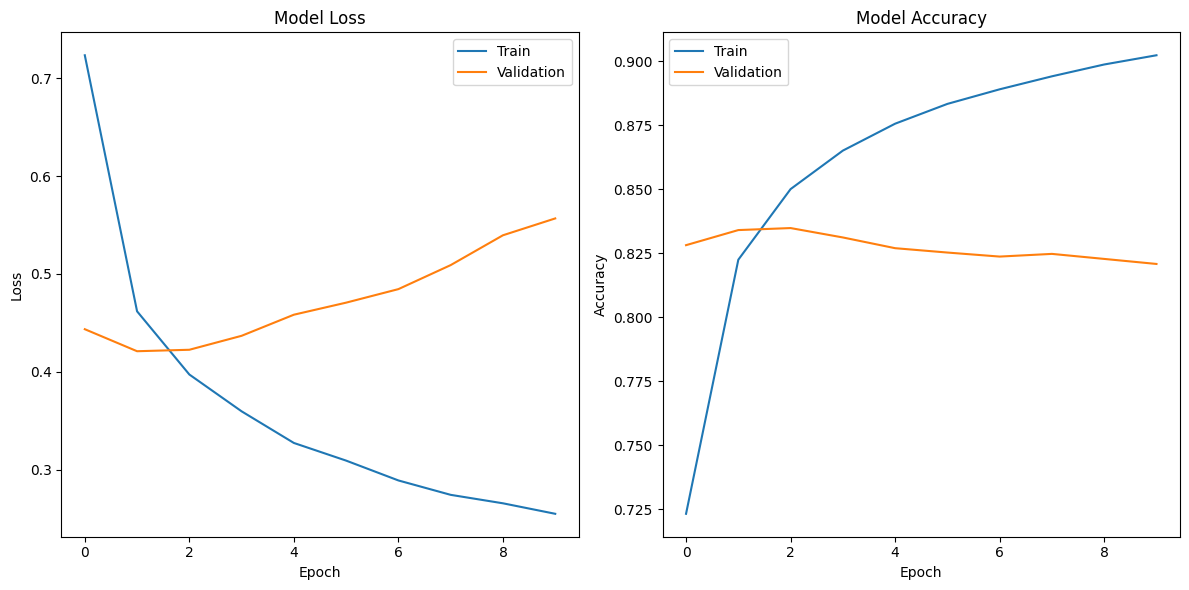

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Define the dataset
data = pd.read_csv('./cyberbullying_tweets.csv')

# Convert data to DataFrame
df = pd.DataFrame(data)

# Display the first few rows
print(df.head())

# Features and labels
X = df['tweet_text']
y = df['cyberbullying_type']

# Text preprocessing
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vectorized = vectorizer.fit_transform(X).toarray()

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Determine the number of unique classes
num_classes = len(np.unique(y_encoded))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.2, random_state=42)

# Build the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  # Adjust the number of output neurons

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()